In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt #plotting
import numpy as np #linear algebra
import os #accessing directory structure
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/archive/fruits-360-original-size/fruits-360-original-size'))

['readme.md', 'Validation', 'Papers', 'Training', 'Meta', 'Test']


In [4]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define a function to convert image to feature vector
def image_to_feature_vector(image, size=(32, 32)):
    resized = cv2.resize(image, size)
    return resized.flatten()

# Set the paths to the directories containing the images
train_path = "/content/drive/MyDrive/Colab Notebooks/archive/fruits-360-original-size/fruits-360-original-size/Training"
test_path = "/content/drive/MyDrive/Colab Notebooks/archive/fruits-360-original-size/fruits-360-original-size/Test"






In [5]:
# Initialize lists to store the images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []



In [13]:
len(train_images)

6231

In [12]:
len(test_images)

3120

In [8]:
# Load the training images and labels
for folder_name in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    for file_name in os.listdir(folder_path):
        if not file_name.endswith(".jpg"):
            continue
        file_path = os.path.join(folder_path, file_name)
        img = cv2.imread(file_path)
        img_feature = image_to_feature_vector(img)
        train_images.append(img_feature)
        train_labels.append(folder_name)



In [9]:
# Load the test images and labels
for folder_name in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    for file_name in os.listdir(folder_path):
        if not file_name.endswith(".jpg"):
            continue
        file_path = os.path.join(folder_path, file_name)
        img = cv2.imread(file_path)
        img_feature = image_to_feature_vector(img)
        test_images.append(img_feature)
        test_labels.append(folder_name)




In [14]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)


In [15]:

# Train the KNN classifier on the training data
knn.fit(train_images, train_labels)



KNeighborsClassifier(n_neighbors=3)

In [16]:
# Use the trained KNN classifier to predict the labels of the test data
predicted_labels = knn.predict(test_images)



In [17]:
# Print the accuracy of the KNN classifier on the test data
accuracy = np.mean(predicted_labels == test_labels)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)



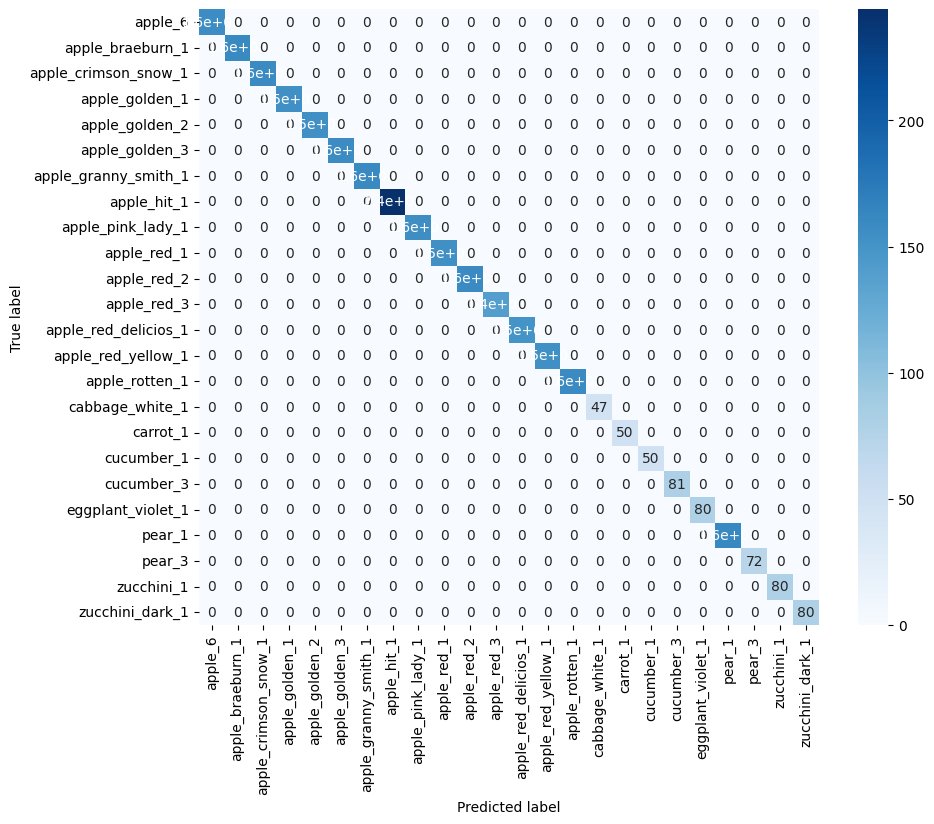

In [19]:

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=sorted(set(test_labels)), yticklabels=sorted(set(test_labels)))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [20]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(test_labels, predicted_labels)

print(report)

                      precision    recall  f1-score   support

             apple_6       1.00      1.00      1.00       157
    apple_braeburn_1       1.00      1.00      1.00       160
apple_crimson_snow_1       1.00      1.00      1.00       159
      apple_golden_1       1.00      1.00      1.00       154
      apple_golden_2       1.00      1.00      1.00       154
      apple_golden_3       1.00      1.00      1.00       158
apple_granny_smith_1       1.00      1.00      1.00       160
         apple_hit_1       1.00      1.00      1.00       244
   apple_pink_lady_1       1.00      1.00      1.00       156
         apple_red_1       1.00      1.00      1.00       154
         apple_red_2       1.00      1.00      1.00       159
         apple_red_3       1.00      1.00      1.00       140
apple_red_delicios_1       1.00      1.00      1.00       150
  apple_red_yellow_1       1.00      1.00      1.00       154
      apple_rotten_1       1.00      1.00      1.00       159
     ca